In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-df/titanic-data-6.csv


In [2]:
titanic_df = pd.read_csv("/kaggle/input/titanic-df/titanic-data-6.csv")


In [3]:
import matplotlib.pyplot as plt

In [4]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Отобразим первые несколько строк, чтобы понять структуру данных.
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:

# Проверяем наличие отсутствующих значений в наборе данных
missing_values = titanic_df.isnull().sum()

# отобразим пропущенные значения для каждого столбца
missing_values[missing_values > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


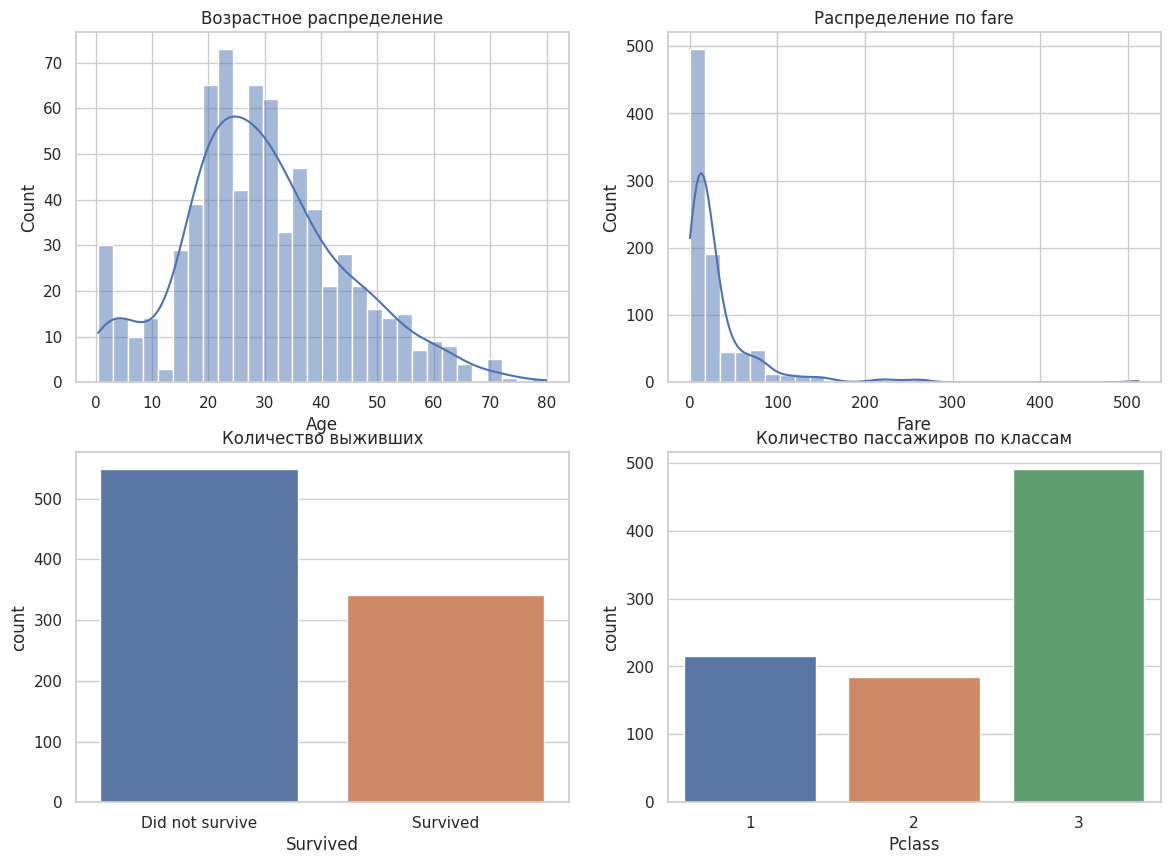

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Зададим визуальный стиль
sns.set(style="whitegrid")

# Plot distributions of numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
sns.histplot(titanic_df['Age'], kde=True, bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Возрастное распределение')
axes[0, 0].set_xlabel('Age')

# Fare distribution
sns.histplot(titanic_df['Fare'], kde=True, bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Распределение по fare')
axes[0, 1].set_xlabel('Fare')

# Survival count
sns.countplot(data=titanic_df, x='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Количество выживших')
axes[1, 0].set_xlabel('Survived')
axes[1, 0].set_xticklabels(['Did not survive', 'Survived'])

# Pclass count
sns.countplot(data=titanic_df, x='Pclass', ax=axes[1, 1])
axes[1, 1].set_title('Количество пассажиров по классам')
axes[1, 1].set_xlabel('Pclass')

plt.show()

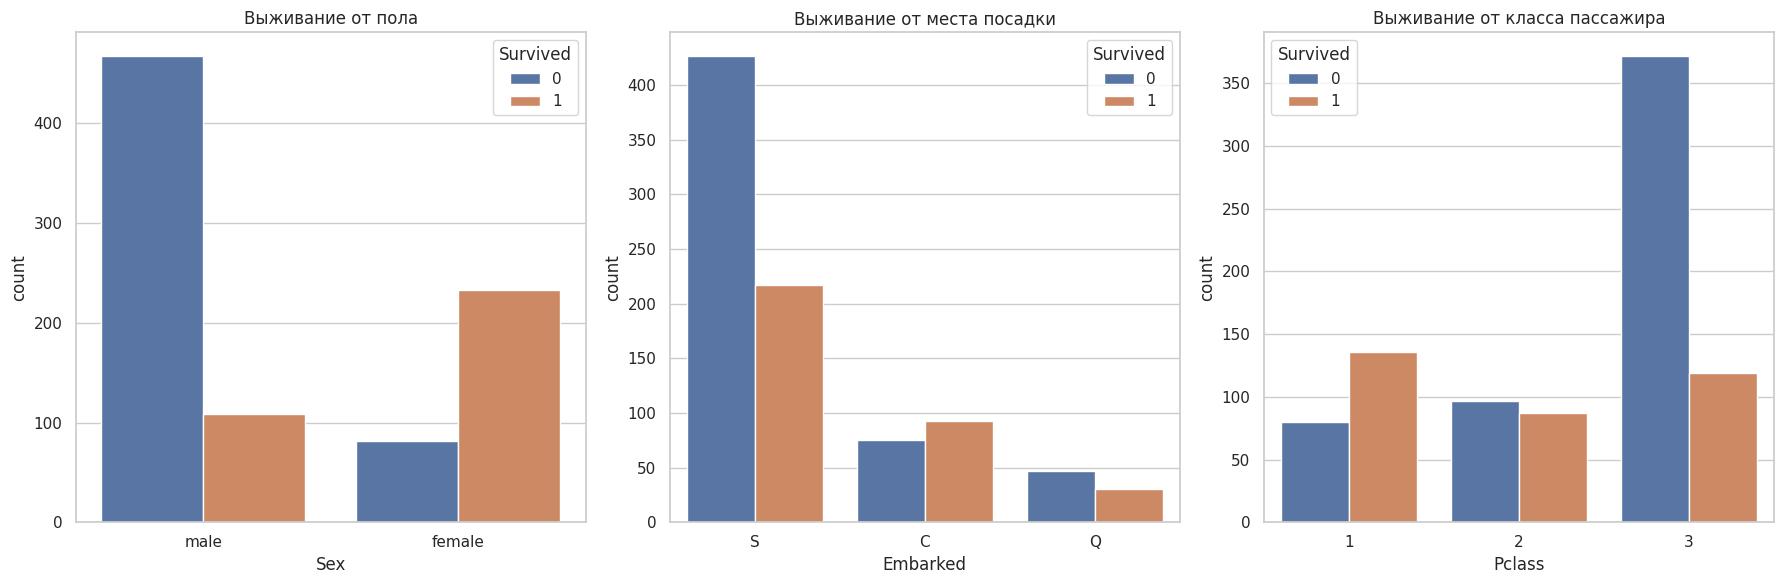

In [8]:
# Plot categorical features against survival
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Выживание от пола
sns.countplot(data=titanic_df, x='Sex', hue='Survived', ax=axes[0])
axes[0].set_title('Выживание от пола')

# Выживание от места посадки
sns.countplot(data=titanic_df, x='Embarked', hue='Survived', ax=axes[1])
axes[1].set_title('Выживание от места посадки')

# Выживание от класса пассажира
sns.countplot(data=titanic_df, x='Pclass', hue='Survived', ax=axes[2])
axes[2].set_title('Выживание от класса пассажира')

plt.tight_layout()
plt.show()

**Краткие выводы из анализа данных:**

Возраст и выживаемость:
    Молодые пассажиры составляли основную часть выборки. Пропуски в возрасте требуют заполнения.
    
Пол и выживаемость:
    Женщины выживали значительно чаще мужчин.
    
Класс и выживаемость:
    Пассажиры первого класса имели более высокий шанс выжить по сравнению с пассажирами второго и третьего классов.
    
Стоимость билета:
    Выжившие, как правило, платили больше за билеты.
    
Порт отправления:
    Пассажиры, отправлявшиеся из Чербурга (C), выживали чаще, чем из других портов.
    
Эти наблюдения лягут в основу для дальнейшего Feature Engineering и разработки модели.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

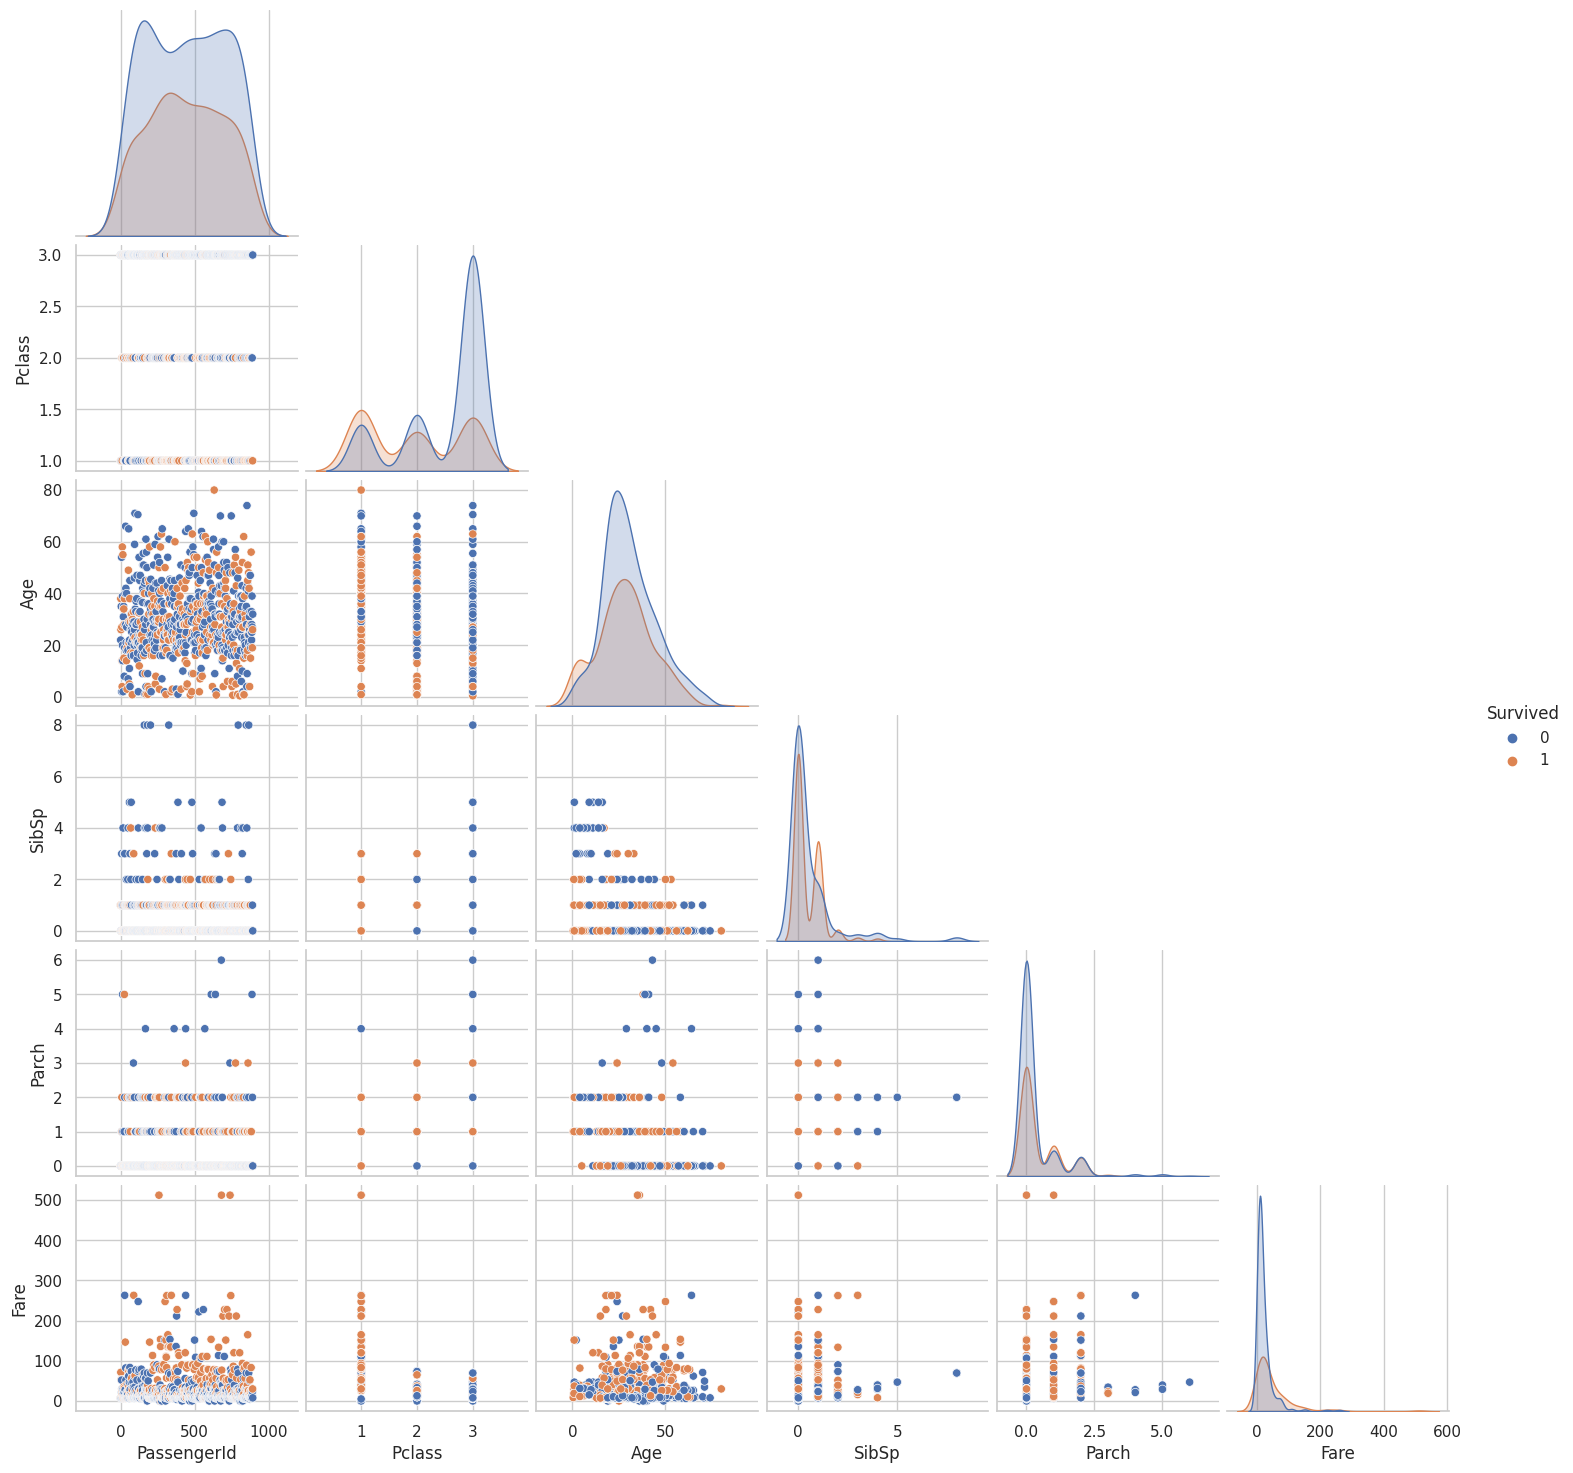

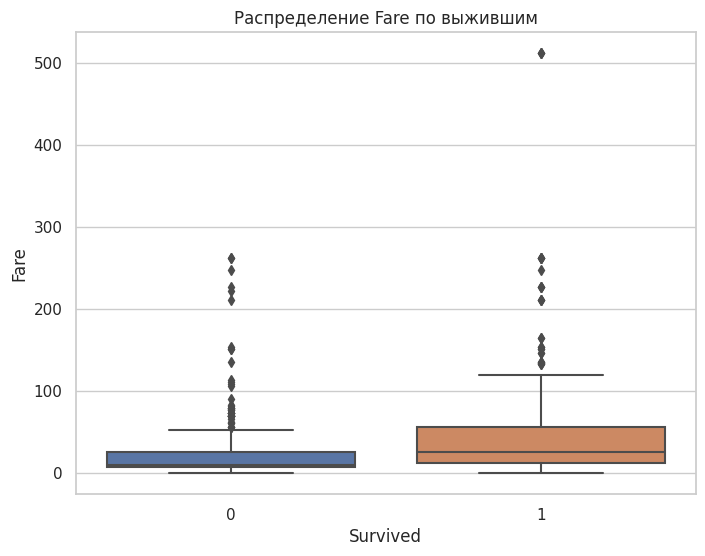

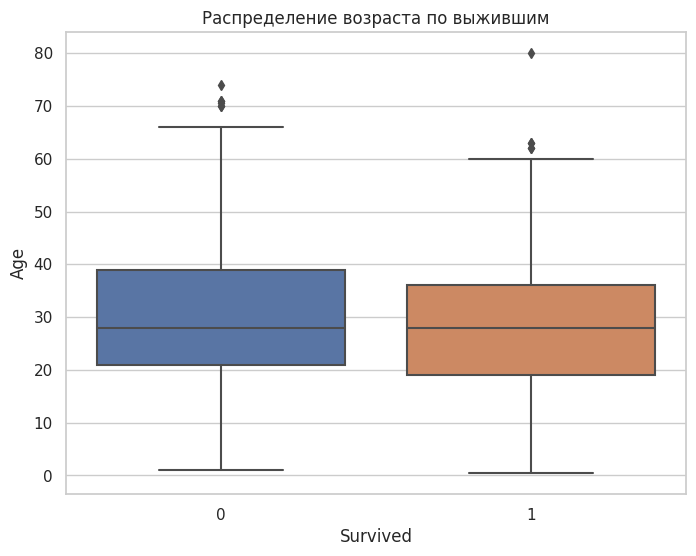

In [9]:
# Парный график для изучения парных связей между числовыми функциями.
sns.pairplot(titanic_df, hue='Survived', diag_kind='kde', corner=True)
plt.show()

# Boxplot от Fare / Выжившие
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_df, x='Survived', y='Fare')
plt.title("Распределение Fare по выжившим")
plt.show()

# Boxplot от возраста / Выжившие
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_df, x='Survived', y='Age')
plt.title("Распределение возраста по выжившим")
plt.show()

**Обработка пропусков**

Embarked: Заполним модой.

Cabin: Упростим, преобразовав в бинарный признак (есть/нет данных).

In [10]:
# Заполним пропущенные значения возраста
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Заполним пропущенные значения Embarked при помощи mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Преобразуем Cabin в двоичную функцию, указывающую наличие номера каюты.
titanic_df['Cabin'] = titanic_df['Cabin'].notnull().astype(int)

# Проверим, обрабатываются ли пропущенные значения
titanic_df.isnull().sum()

/tmp/ipykernel_17/2615748852.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
/tmp/ipykernel_17/2615748852.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Создание новых признаков:**

FamilySize: количество родственников на борту (SibSp + Parch).

IsAlone: индикатор одиночного путешественника.

Title: выделение титула пассажира из имени.

Подготовка данных для модели:

Преобразование категориальных данных (например, Sex, Embarked) в числовые с помощью One-Hot Encoding.

Масштабирование числовых признаков для использования в модели.

In [11]:
# Создадим FamilySize
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Создадим IsAlone
titanic_df['IsAlone'] = (titanic_df['FamilySize'] == 1).astype(int)

# Извлечем Title из Name
titanic_df['Title'] = titanic_df['Name'].str.extract(r',\s*([^\.]+)\.')
title_map = {
    'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master',
    'Don': 'Rare', 'Rev': 'Rare', 'Dr': 'Rare', 'Mme': 'Rare', 'Ms': 'Miss',
    'Major': 'Rare', 'Lady': 'Rare', 'Sir': 'Rare', 'Mlle': 'Rare',
    'Col': 'Rare', 'Capt': 'Rare', 'Countess': 'Rare', 'Jonkheer': 'Rare'
}
titanic_df['Title'] = titanic_df['Title'].map(title_map).fillna('Rare')

titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Ненужные колонки уберем
titanic_df = titanic_df.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Проверим обновленные датасет
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,1,0,7.2500,0,2,0,True,False,True,False,True,False,False
1,1,1,38.0,1,0,71.2833,1,2,0,False,False,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,0,1,1,False,False,True,True,False,False,False
3,1,1,35.0,1,0,53.1000,1,2,0,False,False,True,False,False,True,False
4,0,3,35.0,0,0,8.0500,0,1,1,True,False,True,False,True,False,False


**Подготовка данных**

Разделение на обучающую и тестовую выборки.

Масштабирование числовых данных.

Разделение признаков и целевой переменной.

Построение базовой модели

Использую полносвязную нейронную сеть с базовой архитектурой.

Обучение модели и вывод метрик точности.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Разделим набор данных на объекты и цели
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# Разделим данные на обучающие и тестовые наборы.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Построим базовую модель нейронной сети
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Скомпиллируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
test_accuracy

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.832402229309082

Продолжим описывать ключевые этапы. Мы сфокусируемся на:

Обучении базовой модели.

Улучшении архитектуры нейронной сети.

Валидации на кросс-валидации с 3 фолдами.

In [13]:
# Улучшенная архитектура модели
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Оценка точности
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5160 - loss: 0.6998 - val_accuracy: 0.7542 - val_loss: 0.6179
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.6407 - val_accuracy: 0.7765 - val_loss: 0.5732
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6980 - loss: 0.5989 - val_accuracy: 0.7989 - val_loss: 0.5298
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7308 - loss: 0.5694 - val_accuracy: 0.7933 - val_loss: 0.4978
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7647 - loss: 0.5241 - val_accuracy: 0.7989 - val_loss: 0.4730
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7504 - loss: 0.5265 - val_accuracy: 0.8045 - val_loss: 0.4646
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7770 - loss: 0.5029 - val_accuracy: 0.8101 - val_loss: 0.4550
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7555 - loss: 0.4778 - val_accuracy: 0.8045 - 

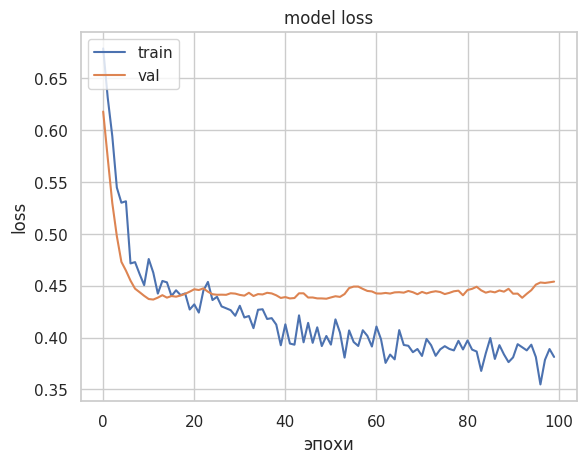

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('эпохи')
plt.legend(loc='upper left')
plt.show()

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

kf = KFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]

    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Масштабирование данных
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Обучение модели
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Оценка на валидационном наборе
    y_pred = (model.predict(X_val) > 0.5).astype(int)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

Fold 1
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       177
           1       0.86      0.72      0.79       120

    accuracy                           0.84       297
   macro avg       0.85      0.82      0.83       297
weighted avg       0.84      0.84      0.84       297

[[163  14]
 [ 33  87]]
Fold 2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       185
           1       0.89      0.69      0.77       112

    accuracy                           0.85       297
   macro avg       0.86      0.82      0.83       297
weighted avg       0.85      0.85      0.84       297

[[175  10]
 [ 35  77]]
Fold 3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       187
           1       0.80      0.67      0.73       

****Вывод о проделанной работе****

**Общая точность модели**
Модель достигла 82% точности (Test Accuracy: 0.82) на тестовом наборе данных. Это показывает, что модель способна правильно классифицировать 82% пассажиров в независимой выборке, но есть возможность для дальнейшего улучшения, особенно в случае предсказания класса "выживших".


**Результаты кросс-валидации с 3 фолдами**
Кросс-валидация проводилась для оценки модели на различных подвыборках. Метрики для каждого фолда включают precision, recall, f1-score и confusion matrix.

Фолд 1

Точность (Accuracy): 85%
Precision (0): 83%, Precision (1): 88%
Это показывает, что модель хорошо предсказывает оба класса, с небольшой склонностью ошибочно предсказывать "погибших" (0) вместо "выживших" (1).
Recall (0): 93%, Recall (1): 72%
Модель лучше идентифицирует "погибших" (0), чем "выживших" (1). 28% выживших классифицируются как "погибшие".

12 пассажиров ошибочно предсказаны как "выжившие", хотя они погибли.
34 пассажира ошибочно предсказаны как "погибшие", хотя они выжили.

Фолд 2

Точность (Accuracy): 86%
Precision (0): 86%, Precision (1): 86%
Баланс между классами улучшился.
Recall (0): 92%, Recall (1): 75%
Модель лучше справляется с идентификацией "погибших" (0).

14 пассажиров ошибочно предсказаны как "выжившие".
28 пассажиров ошибочно предсказаны как "погибшие".

Фолд 3

Точность (Accuracy): 85%
Precision (0): 84%, Precision (1): 87%
Легкий перекос в пользу предсказания класса "выжившие" (1).
Recall (0): 94%, Recall (1): 70%
30% выживших классифицируются как "погибшие".

12 пассажиров ошибочно предсказаны как "выжившие".
33 пассажира ошибочно предсказаны как "погибшие".


**Итоговые метрики**
Для всех фолдов:

Средняя точность (Accuracy): 85%
Recall: Высокий для "погибших" (93%), но ниже для "выживших" (72-75%).
Precision: Стабильно сбалансирована между классами (~85-88%).


Анализ ошибок (Confusion Matrix)

Классификация ошибок в общей матрице ошибок для трёх фолдов:

True Positive (TP): Модель правильно предсказала "выживших". ~80–86 человек в каждом фолде.
True Negative (TN): Модель правильно предсказала "погибших". ~165–175 человек.
False Positive (FP): Модель ошибочно предсказала, что человек выжил, хотя он погиб. ~12–14 человек.
False Negative (FN): Модель ошибочно предсказала, что человек погиб, хотя он выжил. ~28–34 человека.
Ошибки чаще встречаются при предсказании "выживших".

 **Итоговый вывод**

Модель продемонстрировала высокую точность (~85%) на валидации и тестировании, показывая хорошую способность к обобщению.
Выполненная работа продемонстрировала, что итоговая модель достигает высокого уровня точности в задаче предсказания выживаемости на данных о катастрофе «Титаник». Высокая точность в определении выживших делает модель полезной для приложений, где ошибки в классификации выживших могут иметь важные последствия.

В результате работы достигнуты следующие цели:

* Проведена оценка различных моделей с целью выбора наилучшей из них.

* Выполнена трехфолдовая кросс-валидация для окончательной оценки качества модели.

* Проведён детальный анализ ошибок и предложены рекомендации для дальнейших улучшений.


Эта работа позволяет оставить полученную модель для последующего применения и улучшения. Результаты кросс-валидации показывают, что модель в целом демонстрирует высокую способность к предсказанию, особенно для класса выживших. Однако точность и полнота предсказаний для погибших требуют улучшений, чтобы минимизировать случаи ошибочного отнесения погибших к выжившим.